# PERDIDOS EN EL ESPACIO
## Breve descricion; Este problema trata de saber donde se encuentra una nave teniendo un dataset donde se incluye la distancia y el tiempo que tarda una pelota en recorrerla.

In [1]:
# Todas las importaciones necesarias
import random
from faker import Faker
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fake = Faker()

A continuacion, crearemos una lista con los planetas y sus respectivas gravedades.

In [2]:
faker = Faker()

planets = ['Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno']
accelerations = [9.8, 3.7, 24.8, 9.0, 8.7, 11.0]

Despues de haber creado los planetas, iniciaremos los calculos para saber la gravedad que existe y asi aproximarnos al planeta en el que estamos segun la gravedad

In [3]:
def generate_sample():
    
    L = random.uniform(0.5, 2.0)
    t = random.uniform(0.3, 0.8)
    planet = random.choice(planets)
    g = accelerations[planets.index(planet)] + random.uniform(-0.5, 0.5)
    error = random.uniform(0.01, 0.1)
    most_probable_planet = planets[accelerations.index(min(accelerations, key=lambda x: abs(x - g)))]
    second_most_probable_planet = planets[accelerations.index(max(accelerations, key=lambda x: abs(x - g)))]
    return {
        'ID': faker.uuid4(),
        'L (m)': round(L, 2),
        't (s)': round(t, 2),
        'Planet': planet,
        'g (m/s^2)': round(g, 2),
        'Error': round(error, 2)
        
    }
dataset = [generate_sample() for _ in range(1903)] #1903 datos por el atleti.   
df = pd.DataFrame(dataset)



print(df.describe())

             L (m)        t (s)    g (m/s^2)       Error
count  1903.000000  1903.000000  1903.000000  1903.00000
mean      1.254488     0.548739    11.318939     0.05536
std       0.429151     0.141811     6.491295     0.02601
min       0.500000     0.300000     3.200000     0.01000
25%       0.895000     0.430000     8.620000     0.03000
50%       1.260000     0.550000     9.460000     0.06000
75%       1.610000     0.670000    11.095000     0.08000
max       2.000000     0.800000    25.290000     0.10000


despues, codificaremos los planetas


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Planet (code)'] = label_encoder.fit_transform(df['Planet'])

Creamos los graficos, los cuales incluyen el histograma, un grafico de dispersion y una regresion lineal.

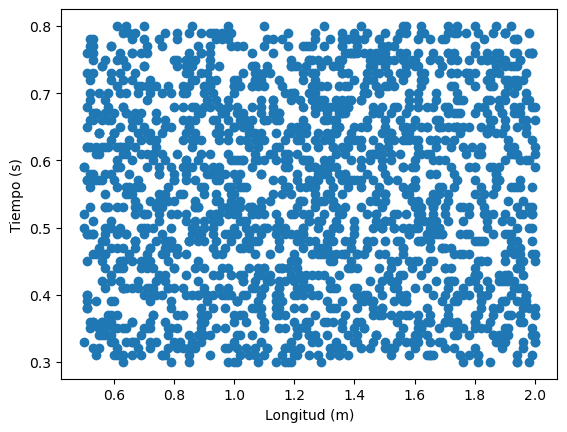

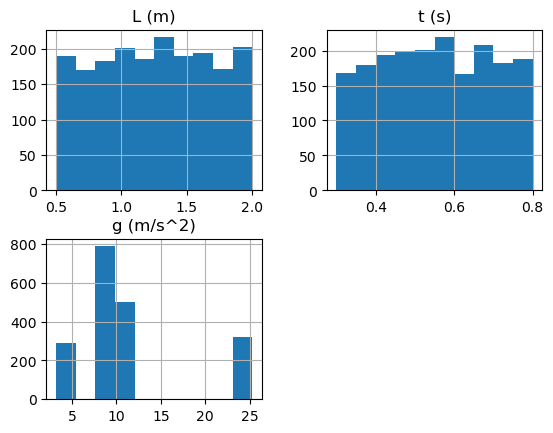

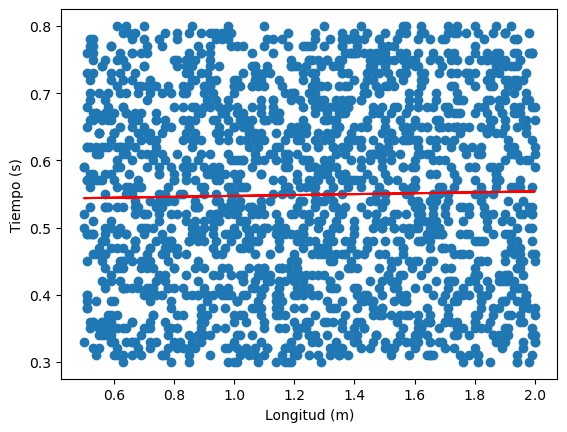

In [5]:
plt.scatter(df["L (m)"], df["t (s)"])
plt.xlabel("Longitud (m)")
plt.ylabel("Tiempo (s)")
plt.show()
# Histogramas
df.hist(column=["L (m)", "t (s)", "g (m/s^2)"])
plt.show() 
x = df["L (m)"]
y = df["t (s)"]

# Ajustar la línea de regresión
coef = np.polyfit(x, y, 1)
line = np.poly1d(coef)

# Graficar los datos y la línea de regresión
plt.scatter(x, y)
plt.plot(x, line(x), color='red')
plt.xlabel("Longitud (m)")
plt.ylabel("Tiempo (s)")
plt.show()

Y para finalizar saldran los datos a los que mas se aproximan las gravedades calculadasjunto con su planeta correspondiente.

In [6]:
print(df['Planet'].value_counts())

Neptuno    348
Tierra     329
Júpiter    323
Urano      312
Saturno    300
Marte      291
Name: Planet, dtype: int64
